In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import nhanes.load #from this package, we obtain some useful datasets for our analysis.
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import session_info

In [2]:
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets
import statsmodels.formula.api as smf

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.graphics.mosaicplot import mosaic

### Import personalized functions (Pandas API)

In [4]:
%run pandas-missing-extension.ipynb

### Setting up general project plot overview.

In [5]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (8,6)
    }
)
sns.set_style("whitegrid")
sns.set_style("whitegrid")

## Issues at time of working with missing values.

In [16]:
air_quality = (
    sm.datasets.get_rdataset("airquality")
    .data
    .clean_names(
        case_type="snake" #column names are transformed into snake_case type names.
    )
    .add_column("year", 1973)
    .assign(
        date=lambda df:pd.to_datetime(df[["year", "month", "day"]])
    )
    .sort_values(by="date")
    .set_index("date")
)

air_quality

,ozone,solar_r,wind,temp,month,day,year
date,,,,,,,
1973-05-01,41.0,190.0,7.4,67,5,1,1973
1973-05-02,36.0,118.0,8.0,72,5,2,1973
1973-05-03,12.0,149.0,12.6,74,5,3,1973
1973-05-04,18.0,313.0,11.5,62,5,4,1973
1973-05-05,NaN,NaN,14.3,56,5,5,1973
...,...,...,...,...,...,...,...
1973-09-26,30.0,193.0,6.9,70,9,26,1973
1973-09-27,NaN,145.0,13.2,77,9,27,1973
1973-09-28,14.0,191.0,14.3,75,9,28,1973


In [18]:
(
    smf.ols(
        formula="temp ~ ozone",
        data=air_quality
    )
    .fit()
    .summary()
    .tables[0]
)

Dep. Variable:,temp,R-squared:,0.488
Model:,OLS,Adj. R-squared:,0.483
Method:,Least Squares,F-statistic:,108.5
Date:,"Fri, 09 Feb 2024",Prob (F-statistic):,2.93e-18
Time:,22:40:16,Log-Likelihood:,-386.27
No. Observations:,116,AIC:,776.5
Df Residuals:,114,BIC:,782.1
Df Model:,1,,
Covariance Type:,nonrobust,,


In [19]:
(
    smf.ols(
        formula="temp ~ ozone + solar_r",
        data=air_quality
    )
    .fit()
    .summary()
    .tables[0]
)

Dep. Variable:,temp,R-squared:,0.491
Model:,OLS,Adj. R-squared:,0.481
Method:,Least Squares,F-statistic:,52.07
Date:,"Fri, 09 Feb 2024",Prob (F-statistic):,1.47e-16
Time:,22:40:47,Log-Likelihood:,-369.78
No. Observations:,111,AIC:,745.6
Df Residuals:,108,BIC:,753.7
Df Model:,2,,
Covariance Type:,nonrobust,,


There are less observations in our linear regressions in contrast to complete `air_quality` dataset, this contains missing values.

### Challenge: Survival data

In [50]:
survival_df = sm.datasets.get_rdataset("flchain", "survival").data.clean_names(case_type="snake").rename(columns={"lambda":"lambda_var"})
survival_df.head()

,age,sex,sample_yr,kappa,lambda_var,flc_grp,creatinine,mgus,futime,death,chapter
0,97,F,1997,5.70,4.860,10,1.7,0,85,1,Circulatory
1,92,F,2000,0.87,0.683,1,0.9,0,1281,1,Neoplasms
2,94,F,1997,4.36,3.850,10,1.4,0,69,1,Circulatory
3,92,F,1996,2.42,2.220,9,1.0,0,115,1,Circulatory
4,93,F,1996,1.32,1.690,6,1.1,0,1039,1,Circulatory


In [51]:
survival_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,age,0,7874,0.000000
1,sex,0,7874,0.000000
2,sample_yr,0,7874,0.000000
3,kappa,0,7874,0.000000
4,lambda_var,0,7874,0.000000
5,flc_grp,0,7874,0.000000
6,creatinine,1350,7874,17.145034
7,mgus,0,7874,0.000000
8,futime,0,7874,0.000000
9,death,0,7874,0.000000


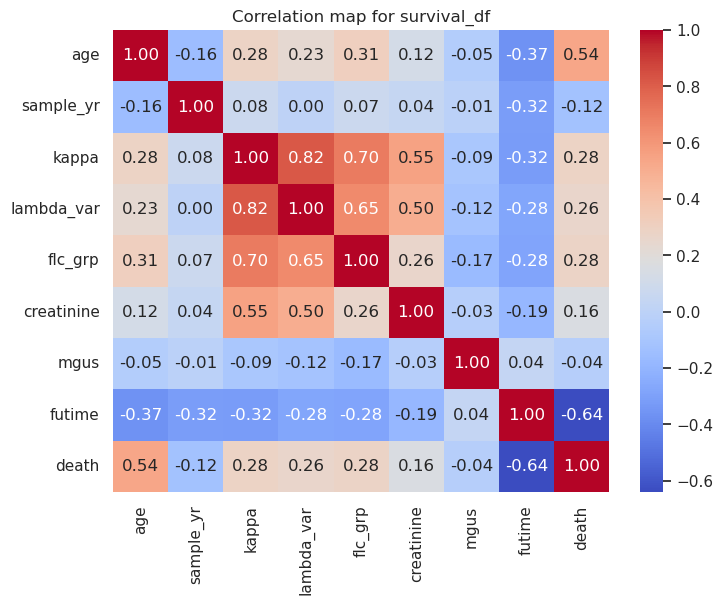

In [45]:
correlation_matrix = survival_df.corr(numeric_only=True)
plt.title("Correlation map for survival_df")
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.show()

In [52]:
(
    smf.ols(
        formula="death ~ age+kappa+flc_grp+lambda_var",
        data=survival_df
    )
    .fit()
    .summary()
    .tables[0]
)

Dep. Variable:,death,R-squared:,0.309
Model:,OLS,Adj. R-squared:,0.308
Method:,Least Squares,F-statistic:,878.6
Date:,"Fri, 09 Feb 2024",Prob (F-statistic):,0.00
Time:,23:06:51,Log-Likelihood:,-3374.5
No. Observations:,7874,AIC:,6759.
Df Residuals:,7869,BIC:,6794.
Df Model:,4,,
Covariance Type:,nonrobust,,


In [53]:
(
    smf.ols(
        formula="death ~ creatinine",
        data=survival_df
    )
    .fit()
    .summary()
    .tables[0]
)

Dep. Variable:,death,R-squared:,0.025
Model:,OLS,Adj. R-squared:,0.025
Method:,Least Squares,F-statistic:,165.0
Date:,"Fri, 09 Feb 2024",Prob (F-statistic):,2.59e-37
Time:,23:07:12,Log-Likelihood:,-4089.4
No. Observations:,6524,AIC:,8183.
Df Residuals:,6522,BIC:,8196.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [57]:
(
    smf.logit(
        formula="death ~ C(chapter)",
        data=survival_df
    )
    .fit()
    .summary()
    .tables[0]
)


PerfectSeparationError: Perfect separation detected, results not available